# Load 32x32x3 images and perform standardization

In [90]:
import os

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

np.set_printoptions(threshold=2000, linewidth=1000, precision=5)
%matplotlib inline

In [91]:
# Create a dict for the images
images = {}
key = 0
# Read images from the given dir and store them in the images dict with increaseing keys
for filename in os.listdir('C:\\Users\\Hunyi\\Downloads\\32x32images'):
        img = mpimg.imread('C:\\Users\\Hunyi\\Downloads\\32x32images\\' + filename)
        images[key] = img
        key += 1

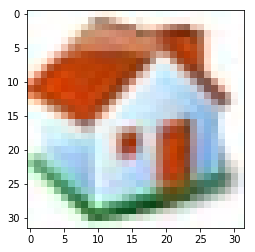

[[[241 252 255 ... 247 249 252]
  [247 254 255 ... 252 252 255]
  [252 255 255 ... 252 255 255]
  ...
  [248 251 255 ... 255 255 254]
  [255 255 255 ... 255 254 251]
  [255 255 255 ... 254 249 246]]

 [[255 255 252 ... 253 255 255]
  [255 255 253 ... 255 255 255]
  [255 255 253 ... 255 255 253]
  ...
  [255 255 254 ... 253 254 255]
  [255 255 254 ... 254 255 255]
  [253 254 252 ... 255 255 255]]

 [[255 255 250 ... 251 253 251]
  [255 255 251 ... 255 255 253]
  [255 253 253 ... 255 255 253]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 253 253 255]
  [255 255 253 ... 251 251 250]]]


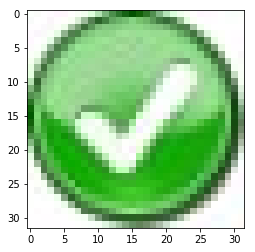

[[[251 249 255 ... 255 255 255]
  [250 255 255 ... 254 255 255]
  [255 255 251 ... 255 255 255]
  ...
  [249 252 255 ... 251 251 250]
  [249 252 255 ... 251 255 255]
  [251 254 255 ... 251 255 255]]

 [[255 251 253 ... 255 254 254]
  [252 255 253 ... 252 254 253]
  [254 254 249 ... 254 253 253]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 253]
  [255 255 255 ... 255 253 251]]

 [[251 250 255 ... 255 255 255]
  [249 255 255 ... 253 255 255]
  [255 255 252 ... 255 255 255]
  ...
  [253 253 255 ... 255 255 255]
  [251 253 255 ... 255 253 250]
  [251 253 255 ... 251 249 248]]]


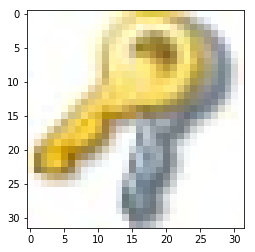

[[[255 255 255 ... 251 255 255]
  [255 255 255 ... 254 255 255]
  [254 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [254 255 255 ... 255 255 255]]

 [[254 254 255 ... 251 250 251]
  [255 255 255 ... 255 254 252]
  [255 255 255 ... 255 254 254]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 254 255 255]
  [255 254 254 ... 255 254 254]]

 [[255 255 255 ... 249 254 255]
  [255 255 255 ... 250 255 255]
  [255 255 255 ... 251 253 255]
  ...
  [248 250 253 ... 255 255 255]
  [253 253 253 ... 255 253 253]
  [255 255 255 ... 253 253 253]]]


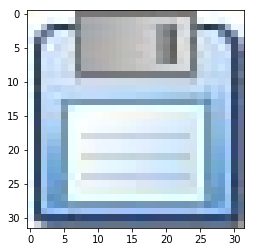

[[[255 255 242 ... 238 236 255]
  [255 254 247 ...  42  67 211]
  [255 251 183 ... 142  50 139]
  ...
  [255 246 168 ... 142  58 101]
  [255 254 237 ...  58  46  99]
  [255 255 239 ...  90 108 157]]

 [[251 255 251 ... 255 244 255]
  [254 255 255 ...  71  82 216]
  [253 255 196 ... 180  74 152]
  ...
  [255 253 183 ... 179  82 114]
  [253 255 248 ...  86  60 102]
  [253 254 246 ... 109 114 153]]

 [[239 251 255 ... 255 255 251]
  [246 255 255 ... 103 103 222]
  [252 255 215 ... 229 110 171]
  ...
  [253 255 204 ... 231 118 133]
  [250 255 255 ... 125  86 109]
  [246 255 255 ... 139 130 152]]]


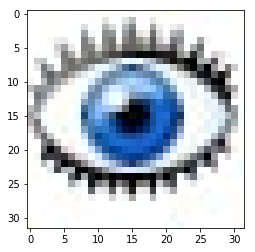

[[[252 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 252 255 255]
  ...
  [254 252 254 ... 254 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[253 254 254 ... 254 254 254]
  [255 255 254 ... 255 255 254]
  [255 255 255 ... 252 254 255]
  ...
  [255 254 255 ... 255 255 254]
  [255 255 255 ... 254 254 253]
  [253 254 254 ... 254 254 251]]

 [[255 255 255 ... 255 251 246]
  [255 255 255 ... 255 253 250]
  [253 253 251 ... 254 255 253]
  ...
  [255 253 255 ... 255 255 255]
  [251 251 253 ... 252 253 253]
  [251 251 251 ... 251 251 248]]]


In [92]:
# Show images and their numpy ndarray representation
fig = plt.figure()
for key in images:
    plt.imshow(images[key])
    plt.show()
    print(images[key].T)
    images[key].setflags(write=1)  # let us modify the array for later steps

In [93]:
# Convert all images to float arrays
for key in images:
    images[key] = images[key].astype(float)

# Create empty arrays for each color
R_flat = np.empty([1,0])
G_flat = np.empty([1,0])
B_flat = np.empty([1,0])
# Push every pixel into its array
for key in images:
    R_flat = np.append(R_flat, images[key][:,:,0].flatten())
    G_flat = np.append(G_flat, images[key][:,:,1].flatten())
    B_flat = np.append(B_flat, images[key][:,:,2].flatten())
# Calculate means and standard deviations
R_mean = np.mean(R_flat)
R_std = np.std(R_flat)
G_mean = np.mean(G_flat)
G_std = np.std(G_flat)
B_mean = np.mean(B_flat)
B_std = np.std(B_flat)

# Standardize
for key in images:
    images[key][:,:,0] = (images[key][:,:,0] - R_mean) / R_std
    images[key][:,:,1] = (images[key][:,:,1] - G_mean) / G_std
    images[key][:,:,2] = (images[key][:,:,2] - B_mean) / B_std

In [94]:
# Check if standardization did well
# Recalc. mean and std for all 3 layers. Mean should be ~0 and std ~1
R_flat = np.empty([1,0])
G_flat = np.empty([1,0])
B_flat = np.empty([1,0])
for key in images:
    R_flat = np.append(R_flat, images[key][:,:,0].flatten())
    G_flat = np.append(G_flat, images[key][:,:,1].flatten())
    B_flat = np.append(B_flat, images[key][:,:,2].flatten())
R_mean = np.mean(R_flat)
R_std = np.std(R_flat)
G_mean = np.mean(G_flat)
G_std = np.std(G_flat)
B_mean = np.mean(B_flat)
B_std = np.std(B_flat)
print('RED mean: ',R_mean)
print('RED std: ',R_std)
print('GREEN mean: ',G_mean)
print('GREEN std: ',G_std)
print('BLUE mean: ',B_mean)
print('BLUE std: ',B_std)

RED mean:  1.3877787807814457e-16
RED std:  1.0
GREEN mean:  9.992007221626409e-17
GREEN std:  1.0
BLUE mean:  1.554312234475219e-16
BLUE std:  1.0000000000000002


# Read some music file and plot its spectogram

In [95]:
from scipy.io import wavfile 

In [96]:
# Read the wav file
samplingFrequency, signalData = wavfile.read('C:\\Users\\Hunyi\\Downloads\\jsb.wav') 

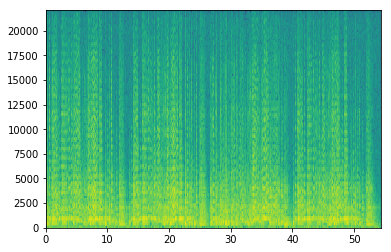

In [97]:
# Plot spectogram
plt.specgram(signalData[:,0], Fs=samplingFrequency) 
plt.show()

# Steal some text from the given website and process it

In [98]:
import urllib.request
import nltk

# Download the raw html
uf = urllib.request.urlopen('https://www.snopes.com/fact-check/facebook-ai-developed-own-language/')
html = uf.read()
print(html)

b'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><head><meta charset="utf-8">\n<script>\n        (function(window, document) {\n            if (!window.__cmp) {\n                window.__cmp = (function() {\n                    var listen = window.attachEvent || window.addEventListener;\n                    listen(\'message\', function(event) {\n                        window.__cmp.receiveMessage(event);\n                    }, false);\n\n                    function addLocatorFrame() {\n                        if (!window.frames[\'__cmpLocator\']) {\n                            if (document.body) {\n                                var frame = document.createElement(\'iframe\');\n                                frame.style.display = \'none\';\n                                frame.name = \'__cmpLocator\';\n                                document.body.appendChild(frame);\n                            } else {\n                                se

In [99]:
# Get rid of the ugly code and keep text only
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# drop html tags
plain_text = soup.get_text()
print(plain_text)


















FACT CHECK: Did Facebook Shut Down an AI Experiment Because Chatbots Developed Their Own Language?


































































































Contact Us
Support Us




















What’s New
Hot 50
Fact Check
News
Video
Archive
Support Us
About Us
Random
 

























Fact Check
Technology





Did Facebook Shut Down an AI Experiment Because Chatbots Developed Their Own Language?
Facebook's artificial intelligence scientists were purportedly dismayed when the bots they created began conversing in their own private language.		




 




















CLAIM

					Concerned artificial intelligence researchers hurriedly abandoned an experimental chatbot program after they realized that the bots were inventing their own language.									
RATING



False












ORIGIN
It is probably not a coincidence that two of the top-trending news stories of July 2017 were, in the first case, a warning from bi

In [100]:
# Create a list of chars from the text
chars = []
list(map(chars.extend, plain_text))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [101]:
chars

['\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'F',
 'A',
 'C',
 'T',
 ' ',
 'C',
 'H',
 'E',
 'C',
 'K',
 ':',
 ' ',
 'D',
 'i',
 'd',
 ' ',
 'F',
 'a',
 'c',
 'e',
 'b',
 'o',
 'o',
 'k',
 ' ',
 'S',
 'h',
 'u',
 't',
 ' ',
 'D',
 'o',
 'w',
 'n',
 ' ',
 'a',
 'n',
 ' ',
 'A',
 'I',
 ' ',
 'E',
 'x',
 'p',
 'e',
 'r',
 'i',
 'm',
 'e',
 'n',
 't',
 ' ',
 'B',
 'e',
 'c',
 'a',
 'u',
 's',
 'e',
 ' ',
 'C',
 'h',
 'a',
 't',
 'b',
 'o',
 't',
 's',
 ' ',
 'D',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'd',
 ' ',
 'T',
 'h',
 'e',
 'i',
 'r',
 ' ',
 'O',
 'w',
 'n',
 ' ',
 'L',
 'a',
 'n',
 'g',
 'u',
 'a',
 'g',
 'e',
 '?',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',

In [102]:
# Drop ' ' and '\n' elements
chars = [x for x in chars if ((x != '\n') and (x != ' '))]

In [103]:
chars

['F',
 'A',
 'C',
 'T',
 'C',
 'H',
 'E',
 'C',
 'K',
 ':',
 'D',
 'i',
 'd',
 'F',
 'a',
 'c',
 'e',
 'b',
 'o',
 'o',
 'k',
 'S',
 'h',
 'u',
 't',
 'D',
 'o',
 'w',
 'n',
 'a',
 'n',
 'A',
 'I',
 'E',
 'x',
 'p',
 'e',
 'r',
 'i',
 'm',
 'e',
 'n',
 't',
 'B',
 'e',
 'c',
 'a',
 'u',
 's',
 'e',
 'C',
 'h',
 'a',
 't',
 'b',
 'o',
 't',
 's',
 'D',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'd',
 'T',
 'h',
 'e',
 'i',
 'r',
 'O',
 'w',
 'n',
 'L',
 'a',
 'n',
 'g',
 'u',
 'a',
 'g',
 'e',
 '?',
 'C',
 'o',
 'n',
 't',
 'a',
 'c',
 't',
 'U',
 's',
 'S',
 'u',
 'p',
 'p',
 'o',
 'r',
 't',
 'U',
 's',
 'W',
 'h',
 'a',
 't',
 '’',
 's',
 'N',
 'e',
 'w',
 'H',
 'o',
 't',
 '5',
 '0',
 'F',
 'a',
 'c',
 't',
 'C',
 'h',
 'e',
 'c',
 'k',
 'N',
 'e',
 'w',
 's',
 'V',
 'i',
 'd',
 'e',
 'o',
 'A',
 'r',
 'c',
 'h',
 'i',
 'v',
 'e',
 'S',
 'u',
 'p',
 'p',
 'o',
 'r',
 't',
 'U',
 's',
 'A',
 'b',
 'o',
 'u',
 't',
 'U',
 's',
 'R',
 'a',
 'n',
 'd',
 'o',
 'm',
 'F',
 'a',
 'c',
 't'

In [104]:
import pandas
from collections import Counter

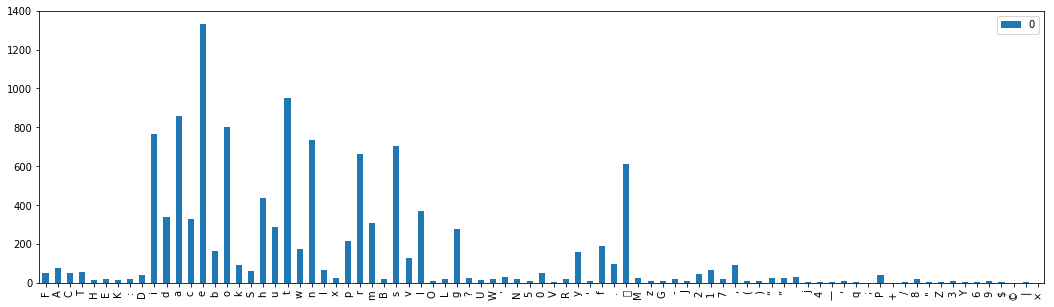

In [105]:
# count each char
letter_counts = Counter(chars)
# create dataframe from the dict
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
# plot the df as a bar plot
df.plot(kind='bar', figsize=(18, 5))